In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [3]:
# Check for missing values in the 'title' column
missing_titles = df['title'].isnull().sum()
print(f"Missing Titles: {missing_titles}")

# Drop rows with missing titles
df = df.dropna(subset=['title'])

Missing Titles: 0


In [4]:
#Perform sentiment analysis on the 'title' column
df['sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

In [5]:
# Display sentiment distribution
sentiment_counts = df['sentiment_category'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
sentiment_category
Neutral     7169
Positive    1038
Negative     600
Name: count, dtype: int64


<ipython-input-6-3612c6417871>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='viridis', order=['Positive', 'Neutral', 'Negative'])


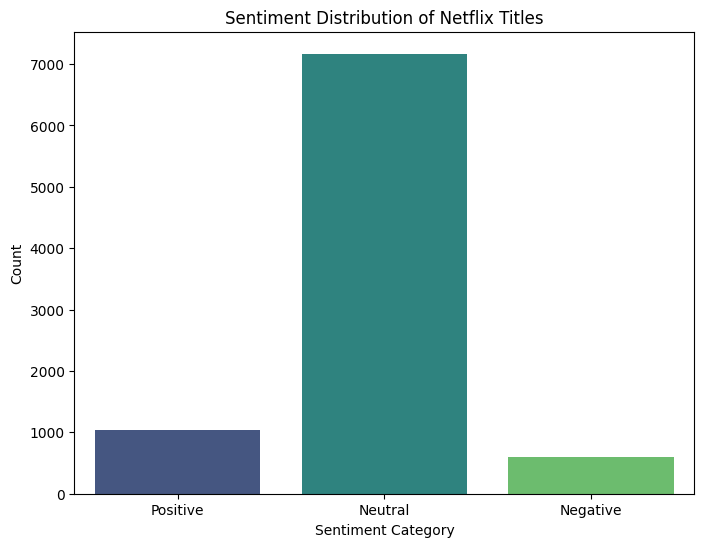

In [6]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='viridis', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of Netflix Titles')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


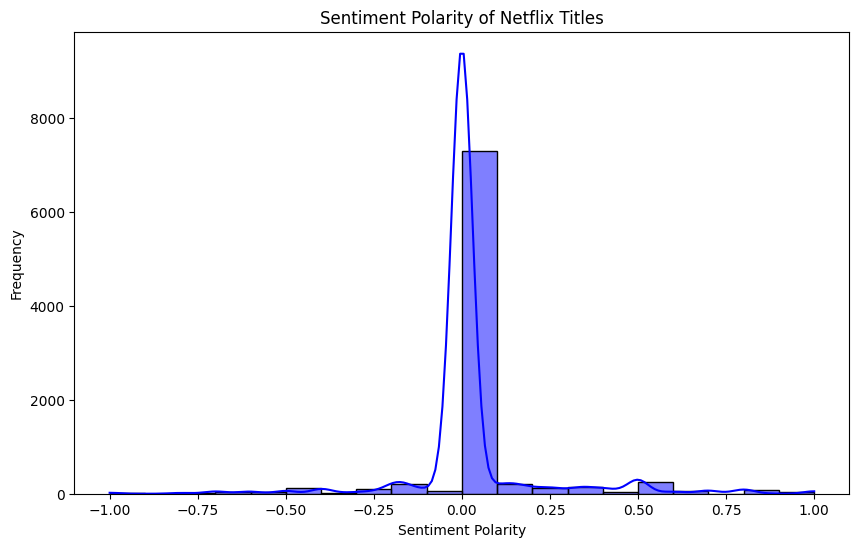

In [7]:
# Plot sentiment polarity histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='blue')
plt.title('Sentiment Polarity of Netflix Titles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Analyze average sentiment per year
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
yearly_sentiment = df.groupby('release_year')['sentiment'].mean().reset_index()


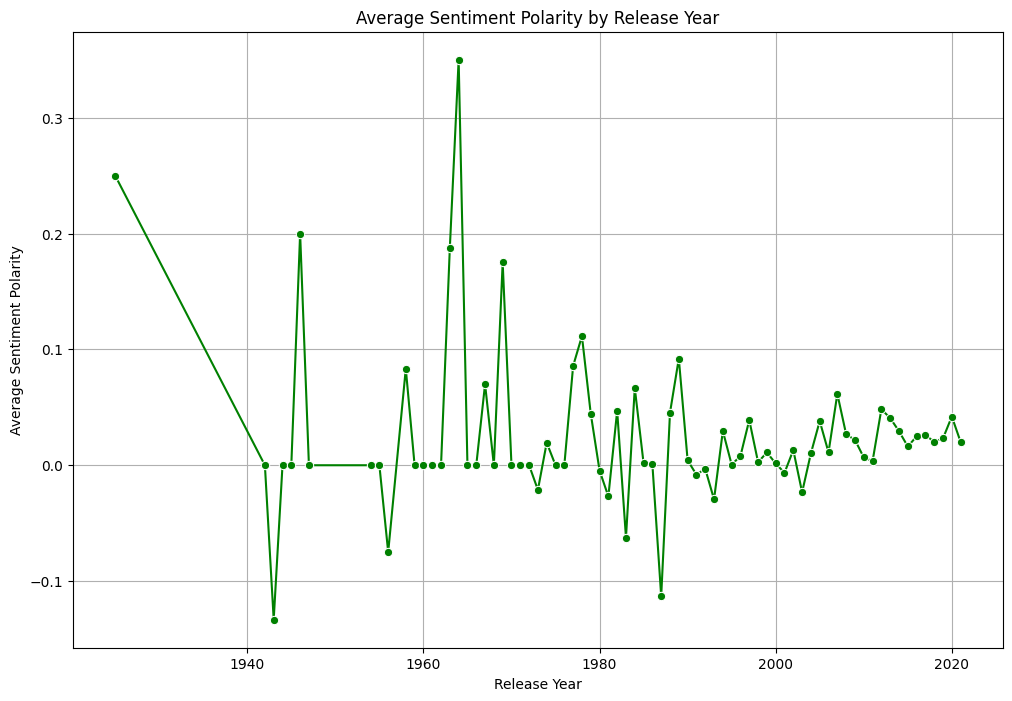

In [9]:
# Plot average sentiment per year
plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='sentiment', data=yearly_sentiment, marker='o', color='green')
plt.title('Average Sentiment Polarity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.show()


In [10]:
# Top titles with highest positive and negative sentiment
top_positive_titles = df.nlargest(5, 'sentiment')[['title', 'sentiment']]
top_negative_titles = df.nsmallest(5, 'sentiment')[['title', 'sentiment']]

print("\nTop 5 Titles with Most Positive Sentiment:")
print(top_positive_titles)

print("\nTop 5 Titles with Most Negative Sentiment:")
print(top_negative_titles)


Top 5 Titles with Most Positive Sentiment:
                                title  sentiment
468   The Guide to the Perfect Family        1.0
599               The Best of Enemies        1.0
775                  A Perfect Ending        1.0
928                  Best of the Best        1.0
1246       A Perfect Day For Arsenide        1.0

Top 5 Titles with Most Negative Sentiment:
                                 title  sentiment
493   RESIDENT EVIL: Infinite Darkness       -1.0
540                    The Worst Witch       -1.0
714                        Beyond Evil       -1.0
1906                              Evil       -1.0
2437               My Horrible Grandma       -1.0


Explanation:
Sentiment Analysis:
The TextBlob library computes polarity for each title (-1 for very negative, 0 for neutral, 1 for very positive).
Titles are categorized as Positive, Neutral, or Negative.

Visualization:
Bar Plot: Distribution of sentiment categories.
Histogram: Distribution of sentiment polarity.
Line Plot: Average sentiment polarity per release year.

Insights:
The code identifies the top 5 most positive and negative titles based on sentiment scores.